# Proyecto del móulo 2

# Variables del dataframe:

1. **listing_id**: Identificador único para cada anuncio en Airbnb.
2. **date**: Fecha específica para la disponibilidad del anuncio (puede contener múltiples fechas para un mismo anuncio).
3. **available**: Indicador de disponibilidad del anuncio para la fecha especificada (`'t'` para disponible, `'f'` para no disponible).
4. **maximum_nights**: Número máximo de noches que se puede reservar para el anuncio.
5. **name**: Nombre del anuncio, generalmente una descripción corta o destacada del alojamiento.
6. **host_id**: Identificador único del anfitrión que publica el anuncio.
7. **host_name**: Nombre del anfitrión.
8. **neighbourhood**: Barrio o área donde se encuentra el alojamiento.
9. **latitude**: Coordenada de latitud del alojamiento.
10. **longitude**: Coordenada de longitud del alojamiento.
11. **room_type**: Tipo de alojamiento ofrecido (`Entire home/apt`, `Private room`, `Shared room`, etc.).
12. **price**: Precio por noche del alojamiento.
13. **minimum_nights**: Número mínimo de noches requeridas para reservar el alojamiento.
14. **number_of_reviews**: Número total de reseñas que ha recibido el anuncio.
15. **last_review**: Fecha de la última reseña recibida.
16. **reviews_per_month**: Promedio de reseñas recibidas por mes.
17. **calculated_host_listings_count**: Número de anuncios activos del anfitrión.
18. **availability_365**: Número de días al año que el alojamiento está disponible para reserva.
19. **number_of_reviews_ltm**: Número de reseñas recibidas en los últimos 12 meses.
20. **license**: Código de licencia del alojamiento, si aplica (algunos anuncios pueden no tenerlo).

# ¿En qué barrio es mejor tener un AirBNB? ¿Qué tipo de AirBNB es más rentable?

## 0. Importamos los módulos que vamos a usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Importamos los datos.

In [2]:
data_1 = pd.read_csv('calendar.csv')
data_2 = pd.read_csv('listings.csv')

### 1.1 Observamos las tablas.

In [3]:
data_1.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96033,2024-06-30,f,$59.00,NaN,3.0,1125.0
1,96033,2024-07-01,t,$59.00,NaN,3.0,1125.0
2,96033,2024-07-02,t,$59.00,NaN,3.0,1125.0
3,96033,2024-07-03,f,$59.00,NaN,3.0,1125.0
4,96033,2024-07-04,f,$59.00,NaN,3.0,1125.0


In [4]:
data_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.720310,-4.361080,Private room,29.0,5,98,2024-06-24,0.63,5,147,9,NaN
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,64.0,1,56,2024-06-16,0.37,6,104,6,VFT/MA/12240
3,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,69.0,3,276,2024-06-30,2.01,1,171,51,VFT/MA/02334
4,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723740,-4.421300,Entire home/apt,96.0,2,377,2024-06-08,2.54,1,125,27,VFT/MA/02288


Verificamos si id y listing_id poseen la misma información:

In [7]:
print(data_2['id'].unique()[:10])
print(data_1['listing_id'].unique()[:10])

[ 96033 166473 330760 340024 358541 413063 421077 427860 505688 507961]
[ 96033 166473 330760 340024 358541 413063 421077 427860 505688 507961]


In [8]:
all_match = data_1['listing_id'].isin(data_2['id']).all()
print("¿Todos los listing_id están en id?", all_match)

¿Todos los listing_id están en id? True


### 1.2 Unimos ambos datasets:

In [9]:
df = pd.merge(data_1, data_2, left_on='listing_id', right_on='id', how='inner')
df.head(), df.shape

(   listing_id        date available price_x  adjusted_price  minimum_nights_x  \
 0       96033  2024-06-30         f  $59.00             NaN               3.0   
 1       96033  2024-07-01         t  $59.00             NaN               3.0   
 2       96033  2024-07-02         t  $59.00             NaN               3.0   
 3       96033  2024-07-03         f  $59.00             NaN               3.0   
 4       96033  2024-07-04         f  $59.00             NaN               3.0   
 
    maximum_nights     id                                              name  \
 0          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 1          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 2          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 3          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 4          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 
    host_id  ...        room_t

Vemos las columnas que tiene:

In [10]:
df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'adjusted_price',
       'minimum_nights_x', 'maximum_nights', 'id', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price_y', 'minimum_nights_y',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

### 1.3 Eliminación de columnas redundantes:

In [11]:
df = df.drop(columns=['price_x', 'minimum_nights_x', 'id'])
df = df.rename(columns={'price_y': 'price', 'minimum_nights_y': 'minimum_nights'})
df.head()

,listing_id,date,available,adjusted_price,maximum_nights,name,host_id,host_name,neighbourhood_group,neighbourhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,2024-06-30,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
1,96033,2024-07-01,t,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
2,96033,2024-07-02,t,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
3,96033,2024-07-03,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
4,96033,2024-07-04,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043


Ahora podemos trabajar con un solo dataset df que contiene toda la información relevante.

## 2. EDA

### 2.1 Resumen de información general del dataframe.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276216 entries, 0 to 3276215
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   listing_id                      int64  
 1   date                            object 
 2   available                       object 
 3   adjusted_price                  float64
 4   maximum_nights                  float64
 5   name                            object 
 6   host_id                         int64  
 7   host_name                       object 
 8   neighbourhood_group             float64
 9   neighbourhood                   object 
 10  latitude                        float64
 11  longitude                       float64
 12  room_type                       object 
 13  price                           float64
 14  minimum_nights                  int64  
 15  number_of_reviews               int64  
 16  last_review                     object 
 17  reviews_per_month          

### 2.2 Resumen estadístico de las variables numéricas.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,3276216.0,5.217126e+17,4.748659e+17,96033.000000,3.774492e+07,6.563914e+17,9.650379e+17,1.189767e+18
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maximum_nights,3276214.0,6.872237e+02,4.520790e+02,1.000000,3.650000e+02,9.990000e+02,1.125000e+03,1.125000e+03
host_id,3276216.0,1.979669e+08,1.797581e+08,45553.000000,4.102521e+07,1.307236e+08,3.292660e+08,5.864050e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3276216.0,3.672025e+01,1.384591e-02,36.646012,3.671808e+01,3.672217e+01,3.672527e+01,3.687565e+01
longitude,3276216.0,-4.421389e+00,2.497524e-02,-4.584345,-4.429422e+00,-4.422600e+00,-4.417430e+00,-4.278520e+00
price,3133866.0,1.561449e+02,2.882533e+02,8.000000,8.900000e+01,1.190000e+02,1.660000e+02,1.209900e+04
minimum_nights,3276216.0,3.088809e+00,1.279437e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.990000e+02
number_of_reviews,3276216.0,4.293054e+01,7.372937e+01,0.000000,3.000000e+00,1.400000e+01,4.900000e+01,9.060000e+02


### 2.3 Estandarización de los datos.

In [ ]:
# 1. Convertir todas las cadenas de texto a minúsculas
string_columns = df.select_dtypes(include='object').columns
for col in string_columns:
    df[col] = df[col].str.lower()

# 2. Convertir las columnas numéricas a tipo float (si no lo son ya)
numeric_columns = df.select_dtypes(exclude=['object', 'datetime']).columns
for col in numeric_columns:
    df[col] = df[col].astype(float)

# 3. Convertir las columnas de fechas a datetime
date_columns = ['last_review'] 
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce') 

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276216 entries, 0 to 3276215
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   listing_id                      float64       
 1   date                            object        
 2   available                       object        
 3   adjusted_price                  float64       
 4   maximum_nights                  float64       
 5   name                            object        
 6   host_id                         float64       
 7   host_name                       object        
 8   neighbourhood_group             float64       
 9   neighbourhood                   object        
 10  latitude                        float64       
 11  longitude                       float64       
 12  room_type                       object        
 13  price                           float64       
 14  minimum_nights                  float64       
 15

### 2.4 Comprobar los valores nulos en el dataframe.

In [15]:
df.isnull().sum()

listing_id                              0
date                                    0
available                               0
adjusted_price                    3276216
maximum_nights                          2
name                                    0
host_id                                 0
host_name                               0
neighbourhood_group               3276216
neighbourhood                           0
latitude                                0
longitude                               0
room_type                               0
price                              142350
minimum_nights                          0
number_of_reviews                       0
last_review                        442745
reviews_per_month                  442745
calculated_host_listings_count          0
availability_365                        0
number_of_reviews_ltm                   0
license                             56576
dtype: int64

Neighbourhood_group y adjusted_price son columnas que no tienen valores, por lo que las eliminamos.

In [16]:
df.drop(columns=['neighbourhood_group', 'adjusted_price'], inplace=True)
print(df.columns)
print(df.shape)

Index(['listing_id', 'date', 'available', 'maximum_nights', 'name', 'host_id',
       'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
(3276216, 20)


Utilizamos un modelo de imputación por la media para intentar rellenar los valores nulos restantes, excepto los de license.

In [17]:
df['maximum_nights'].fillna(df['maximum_nights'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [18]:
df.isnull().sum()/df.shape[0]*100

listing_id                         0.000000
date                               0.000000
available                          0.000000
maximum_nights                     0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       13.513914
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                            1.726870
dtype: float64

Nuestro dataframe solo tiene valores nulos en 2 columnas, license, que serán útiles para un análisis posterior, y last_review.

### 2.5 Outliers

In [22]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
contar_outliers = {}
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    contar_outliers[col] = len(outliers)

for col, cantidad in contar_outliers.items():
    print(f"Columna '{col}': {cantidad} outliers")


Columna 'listing_id': 0 outliers
Columna 'maximum_nights': 0 outliers
Columna 'host_id': 0 outliers
Columna 'latitude': 401865 outliers
Columna 'longitude': 554800 outliers
Columna 'price': 241265 outliers
Columna 'minimum_nights': 122275 outliers
Columna 'number_of_reviews': 332516 outliers
Columna 'reviews_per_month': 194546 outliers
Columna 'calculated_host_listings_count': 337597 outliers
Columna 'availability_365': 0 outliers
Columna 'number_of_reviews_ltm': 240536 outliers


Filtramos las coordenadas dentro del rango de Málaga.

In [20]:
df = df[(df['latitude'] >= 36.5) & (df['latitude'] <= 36.8)]
df = df[(df['longitude'] >= -4.6) & (df['longitude'] <= -4.3)]

### 2.6 Matriz de correlación.

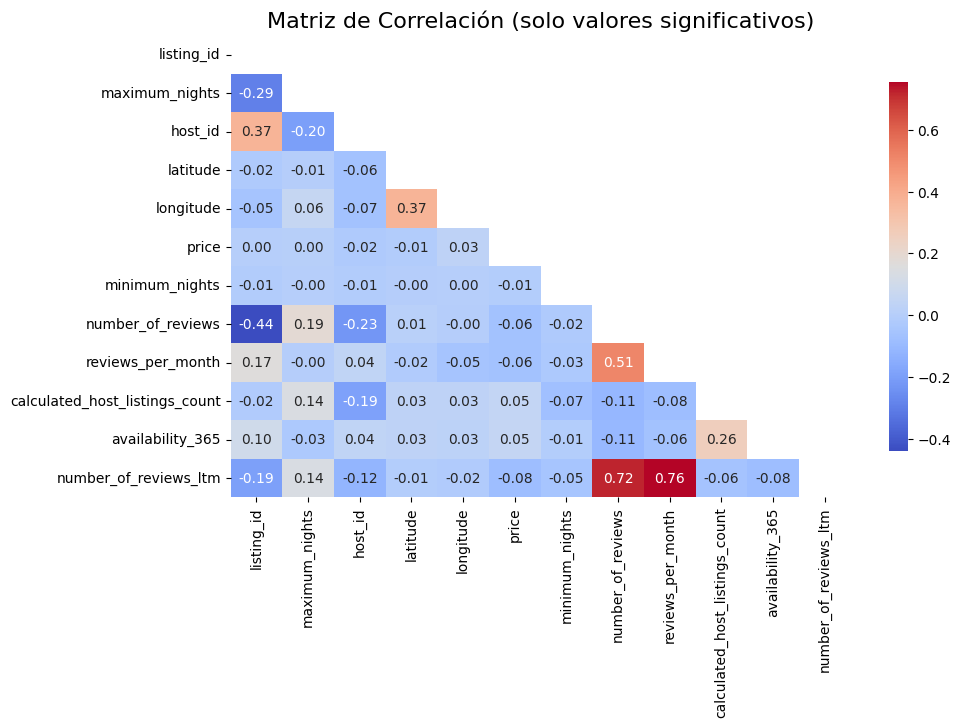

In [23]:
matriz_correlacion = df.select_dtypes(include='number').corr()
máscara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", mask=máscara, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación (solo valores significativos)', fontsize=16)
plt.show()

## 3. Análisis de precios y disponibilidad.

### 3.1 Precio promedio de los alojamientos en Málaga.

El precio promedio de los alojamientos en Málaga es: 156.05€


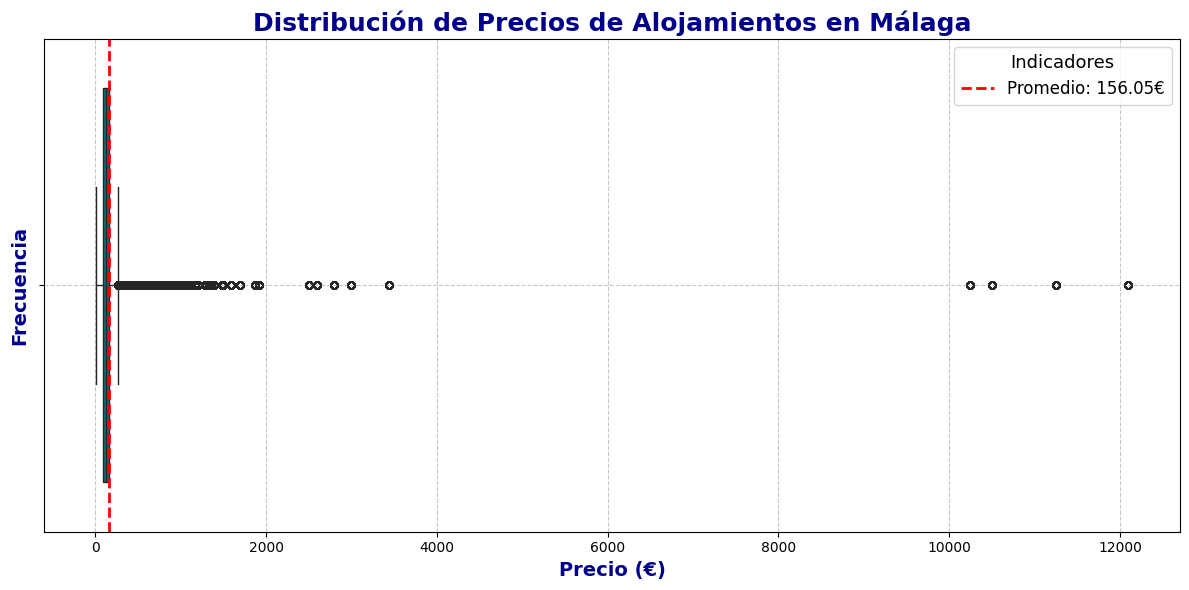

In [27]:
avg_price = df['price'].mean()
print(f"El precio promedio de los alojamientos en Málaga es: {avg_price:.2f}€")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color='teal', fliersize=5)
plt.axvline(avg_price, color='red', linestyle='--', linewidth=2, label=f'Promedio: {avg_price:.2f}€')
plt.title('Distribución de Precios de Alojamientos en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Precio (€)', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Frecuencia', fontsize=14, weight='bold', color='darkblue')
plt.legend(title='Indicadores', title_fontsize='13', loc='upper right', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Podemos observar que la mayoría de precios ronda los 156 euros. Establezcamos 4 categorías de precios: barato (0-80), medio (80-150), caro (150-300), muy caro (>300).

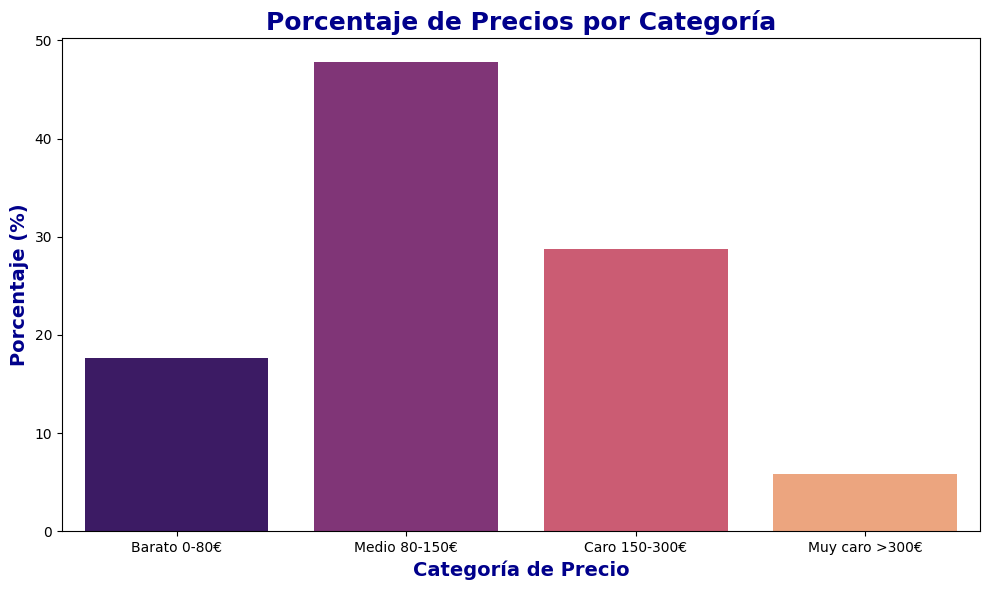

In [28]:
price_bins = [0, 80, 150, 300, np.inf] 
price_labels = ['Barato 0-80€', 'Medio 80-150€', 'Caro 150-300€', 'Muy caro >300€']  
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)
price_category_counts = df['price_category'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=price_category_counts.index, y=price_category_counts.values, palette='magma')
plt.title('Porcentaje de Precios por Categoría', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Categoría de Precio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

### 3.2 Comparación de precios por barrios.

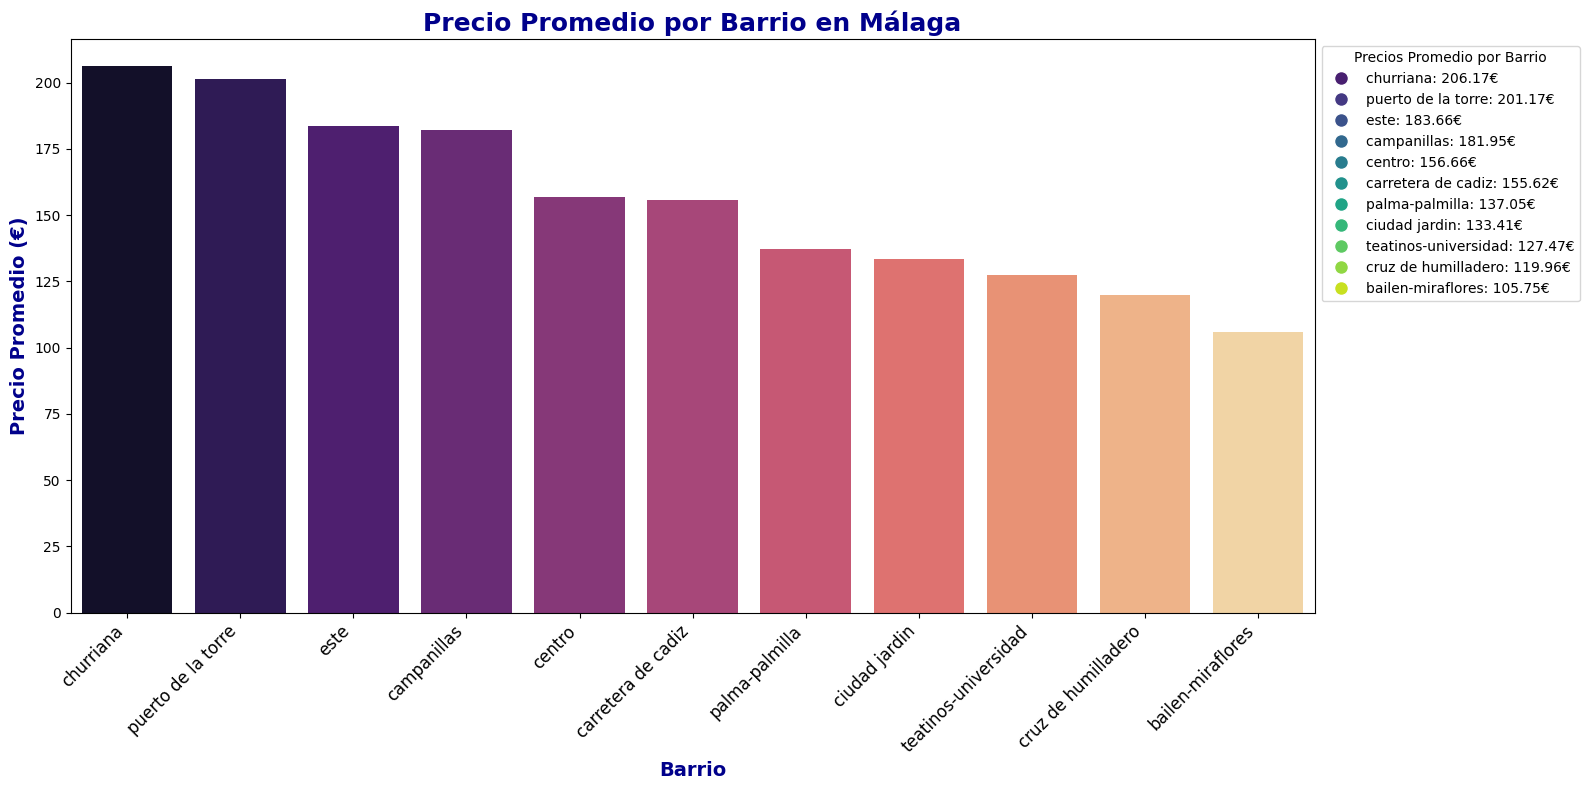

In [196]:
# Calcular el precio promedio por barrio
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Gráfico de barras para comparar precios promedio por barrio
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='magma')

# Mejoramos los títulos y etiquetas
plt.title('Precio Promedio por Barrio en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio Promedio (€)', fontsize=14, weight='bold', color='darkblue')

# Rotación de etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, fontsize=12, ha='right')

# Crear una leyenda con los precios promedio por barrio, con los colores de las barras
handles = []
labels = []
colors = sns.color_palette('viridis', len(avg_price_by_neighbourhood))  # Usamos la misma paleta de colores

for i, (neighbourhood, avg_price) in enumerate(avg_price_by_neighbourhood.items()):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10))
    labels.append(f'{neighbourhood}: {avg_price:.2f}€')

plt.legend(handles=handles, labels=labels, title="Precios Promedio por Barrio", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Mejor presentación
plt.tight_layout()
plt.show()

Podemos observar un orden descendente donde el barrio con el mayor precio promedio es churiana, y el menor es bailen-miraflores.

### 3.3 Comparación de precios por tipo de alojamiento.

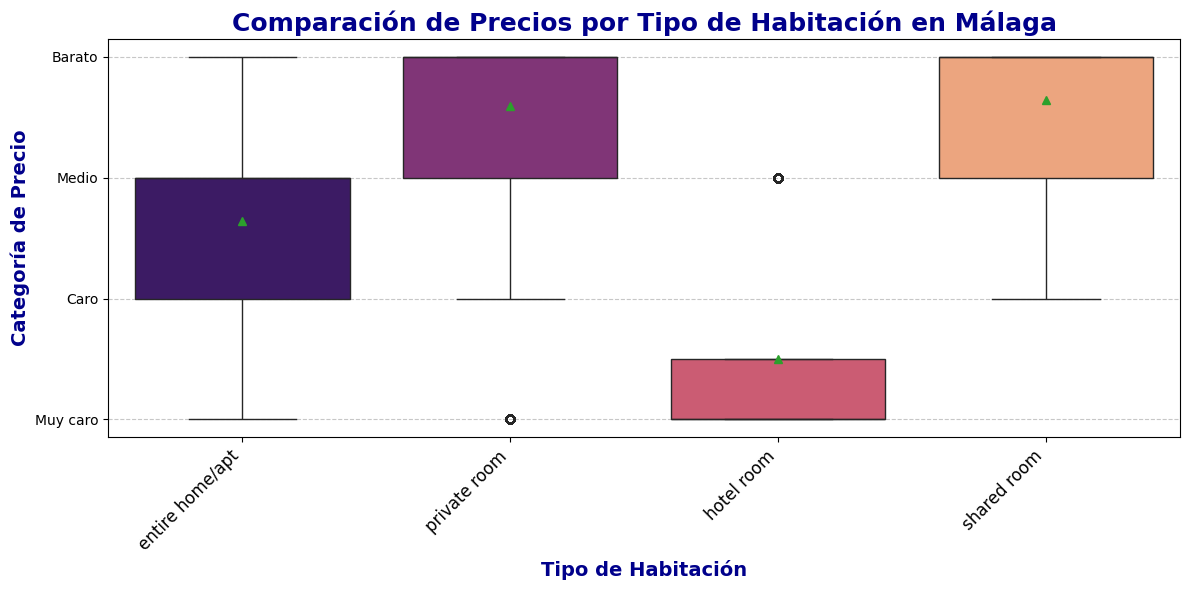

In [197]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de caja (boxplot) con price_category en lugar de price
sns.boxplot(data=df, x='room_type', y='price_category', palette='magma', showmeans=True)

# Mejoramos los títulos y etiquetas
plt.title('Comparación de Precios por Tipo de Habitación en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Tipo de Habitación', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Categoría de Precio', fontsize=14, weight='bold', color='darkblue')

# Rotación de etiquetas en el eje X para mayor legibilidad
plt.xticks(rotation=45, fontsize=12, ha='right')

# Agregar líneas de mediana y puntos de valor atípico
plt.grid(True, linestyle='--', axis='y', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### 3.4 Época del año con mayor o menor disponibilidad.

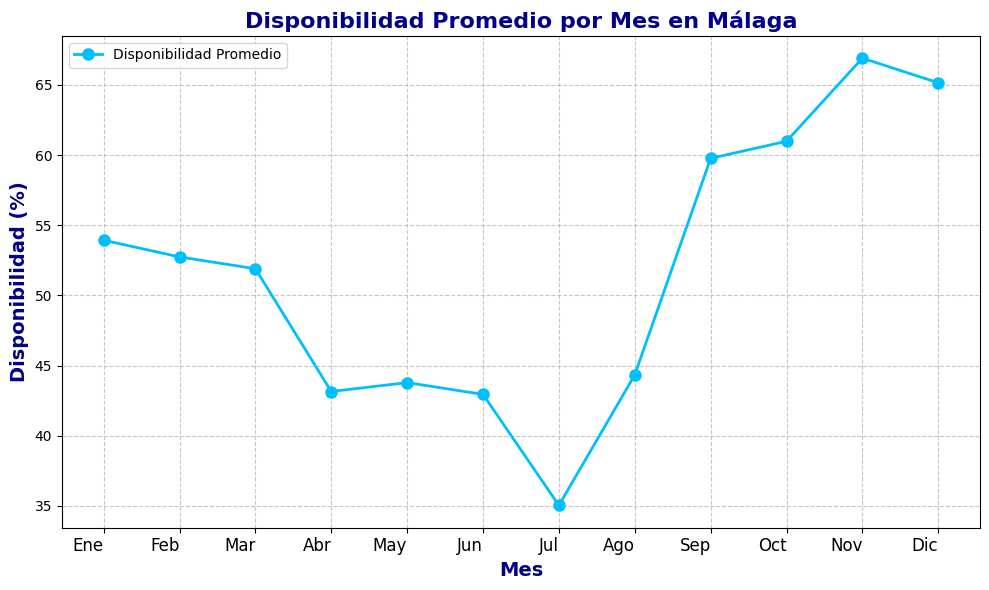

In [198]:
# Convertir la columna 'date' a formato datetime y extraer el mes
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Calcular la disponibilidad promedio por mes
availability_by_month = df.groupby('month')['available'].apply(lambda x: (x == 't').mean() * 100)

# Gráfico de líneas
plt.figure(figsize=(10, 6))

# Gráfico de líneas con mejoras
plt.plot(availability_by_month.index, availability_by_month.values, marker='o', color='deepskyblue', linestyle='-', linewidth=2, markersize=8, label='Disponibilidad Promedio')

# Mejorar títulos y etiquetas
plt.title('Disponibilidad Promedio por Mes en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Mes', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Disponibilidad (%)', fontsize=14, weight='bold', color='darkblue')

# Ajustar los ticks para los meses
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12, ha='right')

# Añadir grilla con estilo
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda
plt.legend()

# Mejorar presentación
plt.tight_layout()
plt.show()

El mes con menor disponibilidad es Julio.

### 3.5 Tendencias estacionales en reservas y precios.

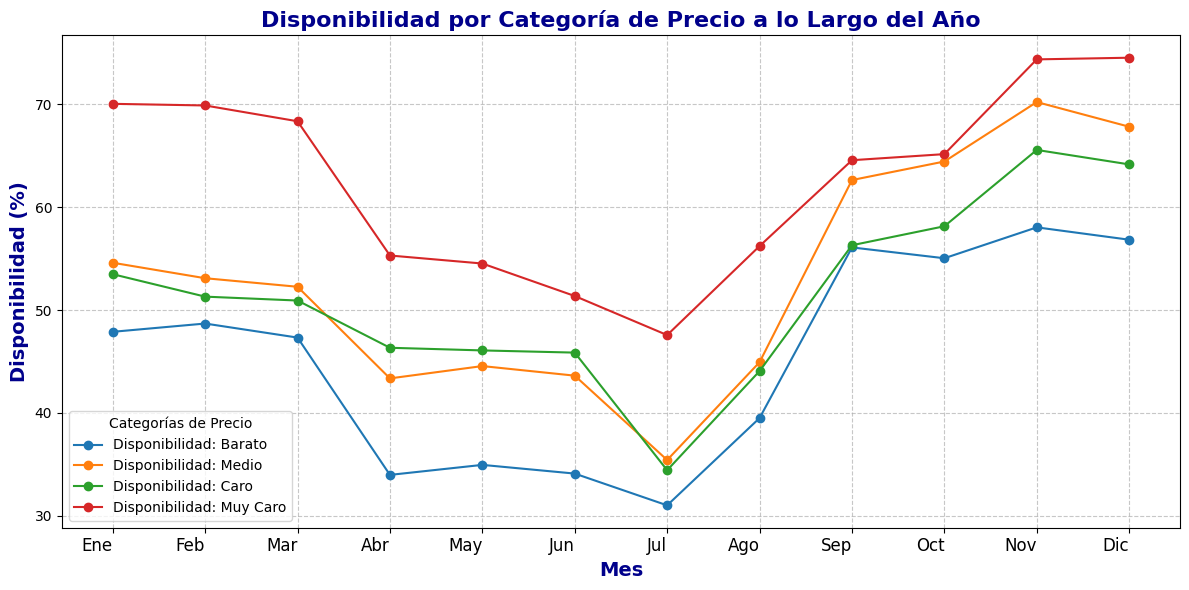

In [199]:
# Definir los rangos de precio (puedes ajustarlos según lo que consideres adecuado)
price_bins = [0, 80, 150, 300, np.inf]  # Por ejemplo: barato, medio, caro, muy caro
price_labels = ['Barato', 'Medio', 'Caro', 'Muy Caro']

# Categorizar los precios en función de los rangos definidos
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Calcular la disponibilidad promedio por mes y por categoría de precio
availability_by_month_price = df.groupby(['month', 'price_category'])['available'].apply(lambda x: (x == 't').mean() * 100).unstack()

# Graficar la disponibilidad por categoría de precio y por mes
plt.figure(figsize=(12, 6))

# Graficar la disponibilidad para cada categoría de precio
for category in price_labels:
    plt.plot(availability_by_month_price.index, availability_by_month_price[category], label=f'Disponibilidad: {category}', marker='o')

# Mejorar títulos y etiquetas
plt.title('Disponibilidad por Categoría de Precio a lo Largo del Año', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Mes', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Disponibilidad (%)', fontsize=14, weight='bold', color='darkblue')

# Ajustar los ticks para los meses
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12, ha='right')

# Añadir grilla con estilo
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda
plt.legend(title="Categorías de Precio")

# Mejor presentación
plt.tight_layout()
plt.show()

Como era de esperar, los pisos baratos son los que menos disponibilidad tienen a lo largo de todo el año, mientras que los caros son los que más disponibilidad tienen.

### 3.6 Factores que más afectan al precio.

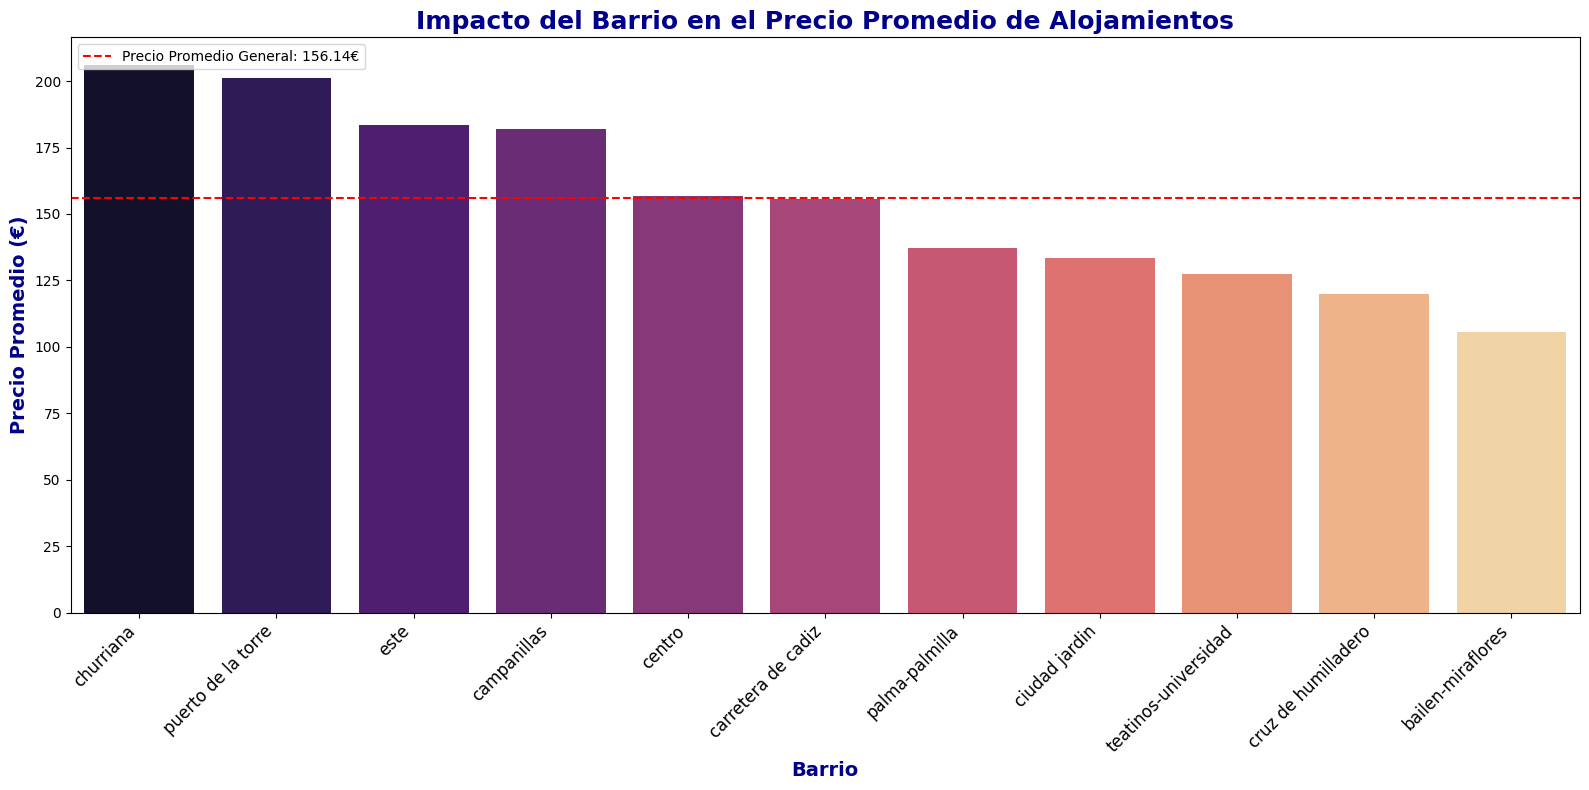

In [200]:
# Calcular el precio promedio por barrio
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Gráfico de barras para comparar precios promedio por barrio
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='magma')

# Mejoramos los títulos y etiquetas
plt.title('Impacto del Barrio en el Precio Promedio de Alojamientos', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio Promedio (€)', fontsize=14, weight='bold', color='darkblue')

# Añadir línea de precio promedio general
avg_price = df['price'].mean()
plt.axhline(avg_price, color='red', linestyle='--', label=f'Precio Promedio General: {avg_price:.2f}€')

# Rotación de etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, fontsize=12, ha='right')

# Añadir leyenda
plt.legend(loc='upper left')

# Mejor presentación
plt.tight_layout()
plt.show()

### 3.7 Tipo de alojamiento.

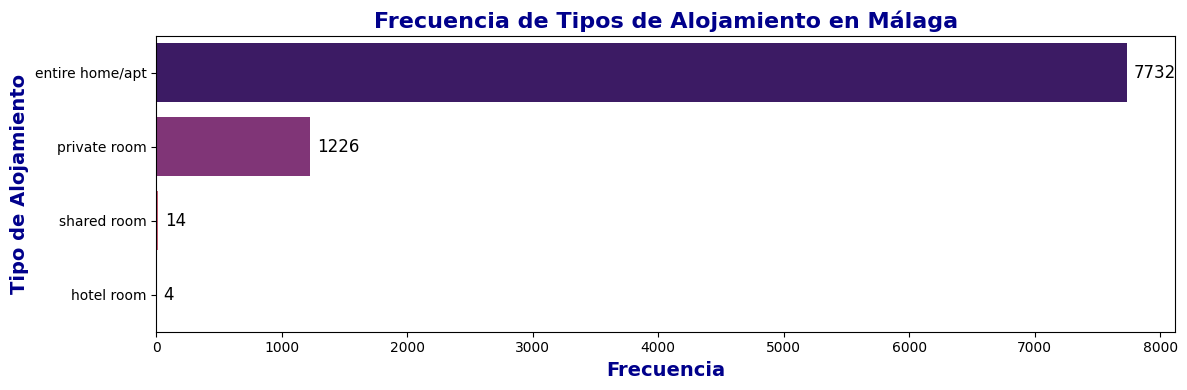

In [201]:
# Eliminar duplicados basados en 'listing_id' para evitar contar duplicados
unique_listings = df.drop_duplicates(subset='listing_id')

# Contar la frecuencia de cada tipo de alojamiento
room_type_count = unique_listings['room_type'].value_counts()

# Gráfico de barras para mostrar el tipo de alojamiento más común
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=room_type_count.values, y=room_type_count.index, palette='magma')

# Mejoramos los títulos y etiquetas
plt.title('Frecuencia de Tipos de Alojamiento en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Frecuencia', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Tipo de Alojamiento', fontsize=14, weight='bold', color='darkblue')

# Añadir las etiquetas con el número de alojamientos encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

# Mejor presentación
plt.tight_layout()
plt.show()

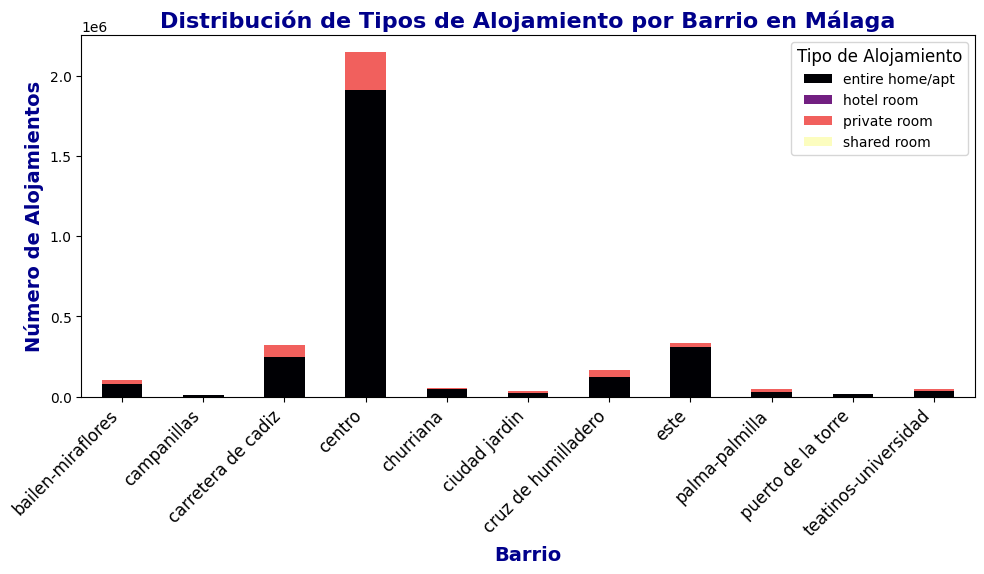

In [202]:
# Contar la frecuencia de cada tipo de alojamiento por barrio
room_type_by_neighbourhood = df.groupby('neighbourhood')['room_type'].value_counts().unstack()

# Gráfico de barras apiladas para mostrar el tipo de alojamiento por barrio
room_type_by_neighbourhood.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='magma')

# Mejoramos los títulos y etiquetas
plt.title('Distribución de Tipos de Alojamiento por Barrio en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Alojamientos', fontsize=14, weight='bold', color='darkblue')

# Rotación de etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, fontsize=12, ha='right')

# Añadir leyenda
plt.legend(title='Tipo de Alojamiento', fontsize=10, title_fontsize=12)

# Mejor presentación
plt.tight_layout()
plt.show()

## 4. Condiciones legales.
---



### Normativa de Airbnb en Málaga:
1. **Registro obligatorio**:  
   Los alojamientos turísticos deben registrarse en el **Registro de Turismo de Andalucía (RTA)**. Cada propiedad obtiene un código identificativo (VFT, Vivienda con Fines Turísticos) que debe incluirse en los anuncios.

2. **Duración de alquiler**:  
   - Los alquileres a corto plazo están limitados a un máximo de **60 noches consecutivas** por persona.
   - No hay un límite anual de días, pero no se permite superar los **11 meses consecutivos** en contratos considerados de corto plazo.

3. **Impuestos**:  
   - Los anfitriones deben declarar los ingresos generados por el alquiler en el **IRPF** (Impuesto sobre la Renta de las Personas Físicas).
   - Pueden aplicarse impuestos turísticos adicionales en ciertos casos.

4. **Condiciones de la propiedad**:  
   - La vivienda debe cumplir con requisitos básicos de habitabilidad y seguridad, como disponer de aire acondicionado o calefacción según la temporada, extintores, y manuales de instrucciones para electrodomésticos.
   - Los anfitriones deben proporcionar información clara sobre la normativa de ruido.

5. **Multas por incumplimiento**:  
   Las sanciones por no cumplir con la normativa incluyen multas económicas importantes, que pueden variar dependiendo de la gravedad de la infracción.

6. **Prohibiciones en algunos barrios**:  
   En zonas donde el turismo de corta estancia afecta la disponibilidad de vivienda para residentes locales, los gobiernos locales pueden restringir la emisión de licencias.


### 4.1 Irregularidades en cuanto a la duración de la estancia.

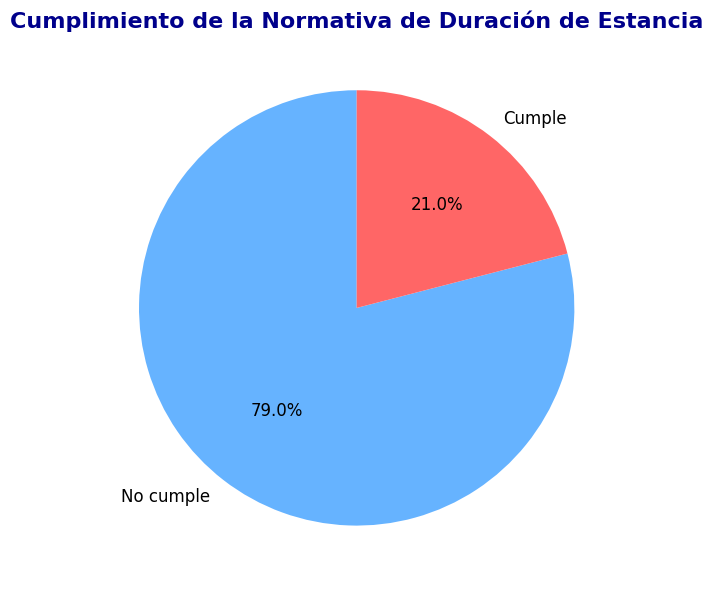

In [203]:
# Filtrar los datos para evitar duplicados basados en 'listing_id'
df_unique = df.drop_duplicates(subset=['listing_id']).copy()

# Crear una columna para clasificar propiedades según cumplimiento de duración máxima
df_unique.loc[:, 'duration_compliance'] = df_unique['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')

# Verificar cuántas propiedades cumplen o no cumplen la normativa
compliance_counts = df_unique['duration_compliance'].value_counts()

# Colores para el gráfico
colors = ['#66b3ff', '#ff6666']

# Gráfico de tarta para visualizar el cumplimiento de la normativa
plt.figure(figsize=(8, 6))
plt.pie(compliance_counts, labels=compliance_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Cumplimiento de la Normativa de Duración de Estancia', fontsize=16, weight='bold', color='darkblue')

# Mostrar gráfico
plt.tight_layout()
# Crear la columna 'duration_compliance' si no existe
if 'duration_compliance' not in df.columns:
    df['duration_compliance'] = df['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')
# Crear la columna 'duration_compliance' si no existe
if 'duration_compliance' not in df.columns:
    df['duration_compliance'] = df['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')
plt.show()

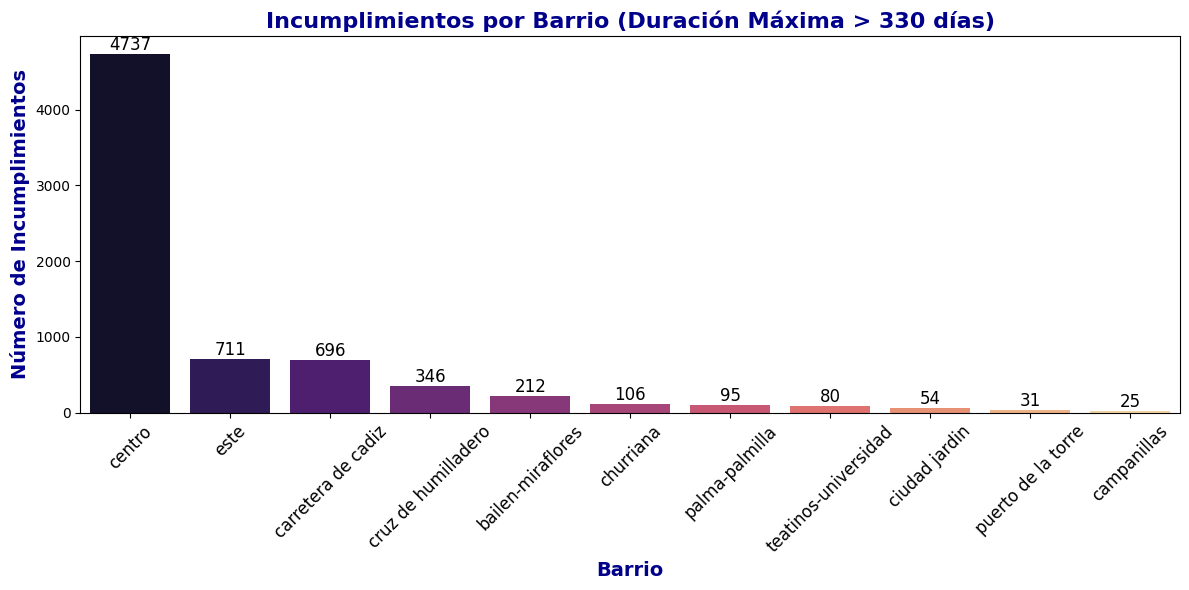

In [204]:
# Crear la columna 'duration_compliance' si no existe
if 'duration_compliance' not in df.columns:
    df['duration_compliance'] = df['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')

# Filtrar los datos para evitar duplicados basados en 'listing_id'
df_unique = df.drop_duplicates(subset=['listing_id'])

# Análisis adicional: Número de alojamientos que incumplen por barrio
non_compliant_by_neighbourhood = df_unique[df_unique['duration_compliance'] == 'No cumple']['neighbourhood'].value_counts()

# Gráfico de barras para visualizar los incumplimientos por barrio
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=non_compliant_by_neighbourhood.index, y=non_compliant_by_neighbourhood.values, palette='magma')

# Títulos y etiquetas
plt.title('Incumplimientos por Barrio (Duración Máxima > 330 días)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Incumplimientos', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)

# Etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Mostrar gráfico
plt.tight_layout()
plt.show()

### 4.2 Irregularidades en cuanto a la posesión de licencia.

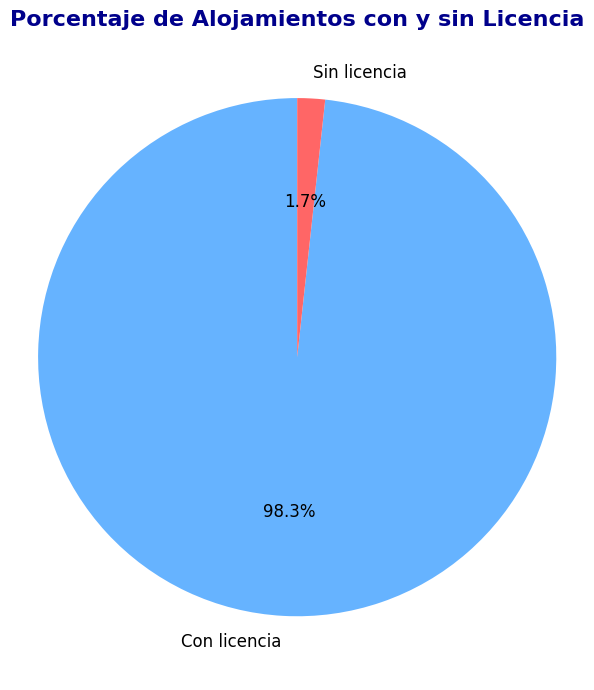

In [205]:
# Crear una nueva columna para indicar si tiene licencia o no (trabajar sobre una copia si es necesario)
df_unique = df.drop_duplicates(subset=['listing_id']).copy()  # Evitar duplicados basados en 'listing_id'
df_unique['has_license'] = df_unique['license'].notnull()

# Contar la cantidad de alojamientos con y sin licencia
license_counts = df_unique['has_license'].value_counts()

# Graficar el porcentaje de alojamientos con y sin licencia
plt.figure(figsize=(6, 7))  # Ajustar el tamaño para mejor visualización
plt.pie(
    license_counts,
    labels=['Con licencia', 'Sin licencia'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff6666'],
    textprops={'fontsize': 12}
)
plt.title('Porcentaje de Alojamientos con y sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.axis('equal')  # Para que el gráfico de tarta sea circular
plt.tight_layout()  # Asegurar que no haya recortes en el gráfico
plt.show()

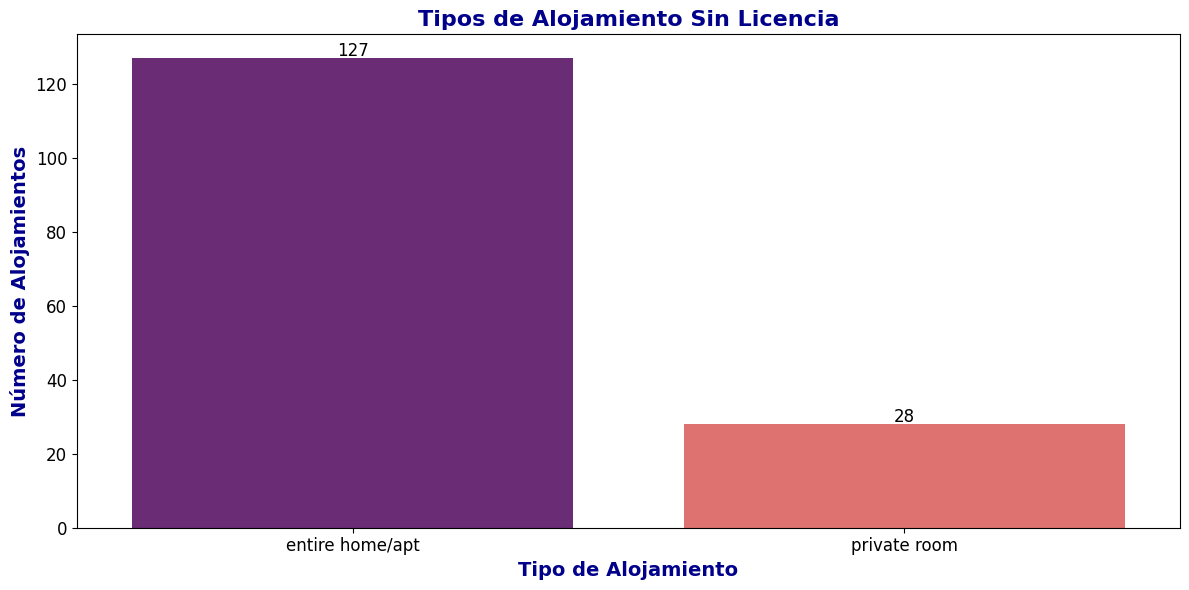

In [206]:
# Crear la columna 'has_license' si no existe
if 'has_license' not in df.columns:
    df['has_license'] = df['license'].notnull()

# Filtrar los alojamientos sin licencia (asegurando que no haya duplicados en 'listing_id')
no_license_df = df.drop_duplicates(subset=['listing_id'])
no_license_df = no_license_df[no_license_df['has_license'] == False]

# Gráfico de barras del tipo de alojamiento sin licencia
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
ax = sns.countplot(data=no_license_df, x='room_type', palette='magma', order=no_license_df['room_type'].value_counts().index)

# Añadir los números exactos sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Asegurar que el valor es entero
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Títulos y etiquetas
plt.title('Tipos de Alojamiento Sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Tipo de Alojamiento', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Alojamientos', fontsize=14, weight='bold', color='darkblue')

# Mejorar la visualización
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Solo 2 tipos de alojamiento destacan por que algunos de los host no poseen licencia, habitación privada y apartamento. Aqui apartamento destaca notablemente sobre la habitación privada con 46356 apartamentos sin licencia.

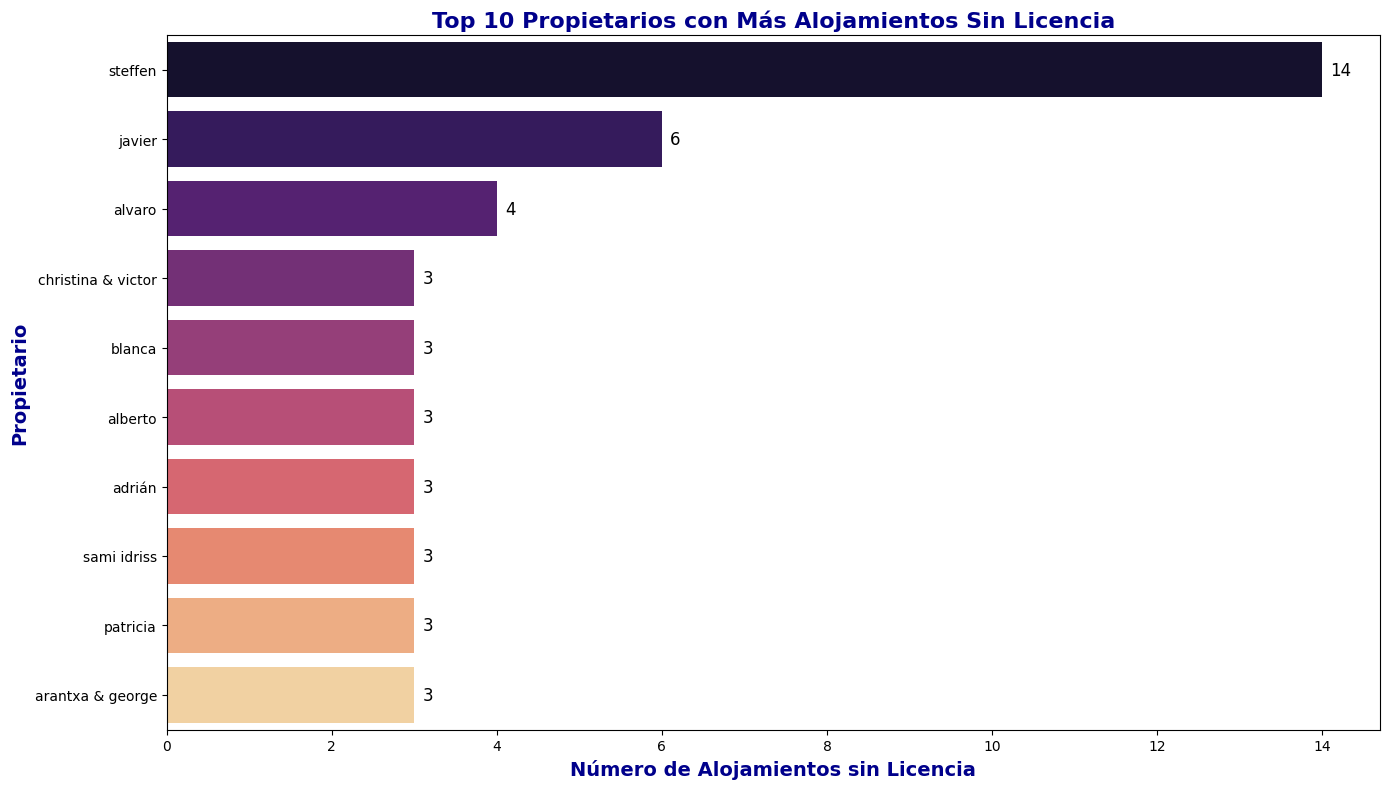

In [207]:
# Filtrar los alojamientos que no tienen licencia
no_license_hosts = df[df['license'].isna() | (df['license'] == '')]

# Contar el número de alojamientos sin licencia por propietario
no_license_by_host = no_license_hosts.groupby('host_name')['listing_id'].nunique()

# Ordenar por número de alojamientos sin licencia y seleccionar los primeros 10
top_10_no_license_hosts = no_license_by_host.sort_values(ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_no_license_hosts.values, y=top_10_no_license_hosts.index, palette='magma')

# Títulos y etiquetas
plt.title('Top 10 Propietarios con Más Alojamientos Sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Número de Alojamientos sin Licencia', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Propietario', fontsize=14, weight='bold', color='darkblue')

# Añadir los valores encima de las barras
for i, value in enumerate(top_10_no_license_hosts.values):
    plt.text(value + 0.1, i, f'{value}', ha='left', va='center', fontsize=12)

# Mejorar presentación
plt.tight_layout()
plt.show()

Aqui podemos ver algunos ejemplos de propietarios y el número de alojamientos sin licencia que tienen. Muy mal steffen...

## 5. Análisis de mercado.

### 5.1 ¿Cuáles son los barrios con más alojamientos listados?

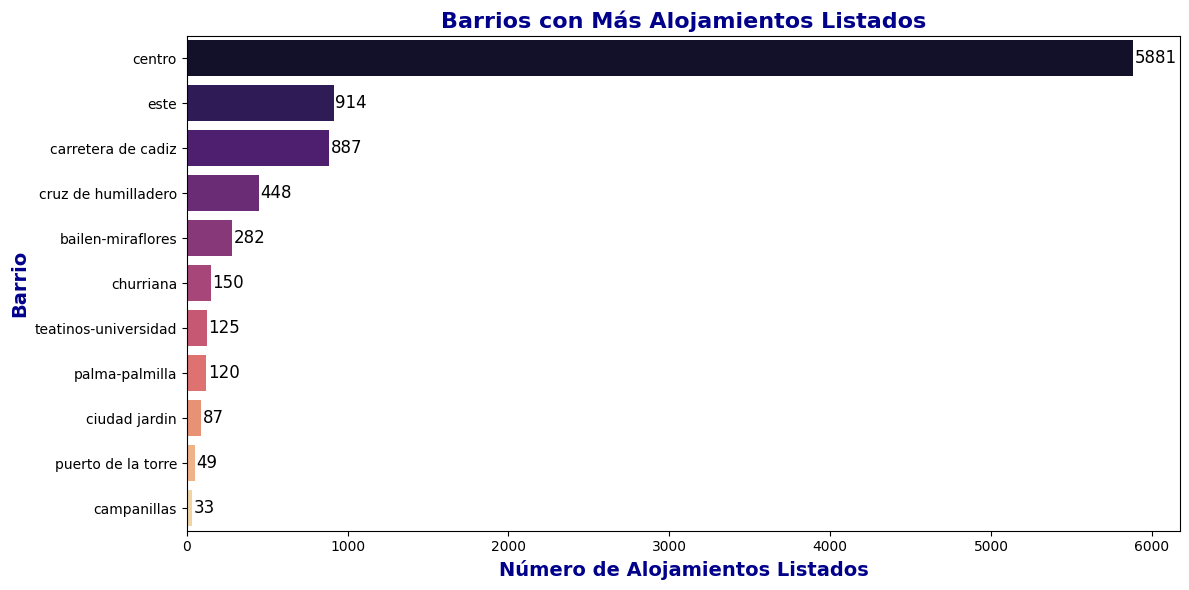

In [208]:
# Contar el número de alojamientos únicos por barrio
listings_by_neighbourhood = df.groupby('neighbourhood')['listing_id'].nunique()

# Ordenar los barrios por el número de alojamientos
listings_by_neighbourhood_sorted = listings_by_neighbourhood.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=listings_by_neighbourhood_sorted.values, y=listings_by_neighbourhood_sorted.index, palette='magma')

# Títulos y etiquetas
plt.title('Barrios con Más Alojamientos Listados', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Número de Alojamientos Listados', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Barrio', fontsize=14, weight='bold', color='darkblue')

# Añadir los valores encima de las barras
for i, value in enumerate(listings_by_neighbourhood_sorted.values):
    plt.text(value + 10, i, f'{value}', ha='left', va='center', fontsize=12)

# Mejorar presentación
plt.tight_layout()
plt.show()

En el centro es donde más alojamientos encontramos con diferencia con 2146541, frente a los 12045 alojamientos de campanillas, zona con el menor número de alojamientos.

### 5.2 ¿Qué porcentaje de alojamientos pertenece a anfitriones que gestionan múltiples propiedades?


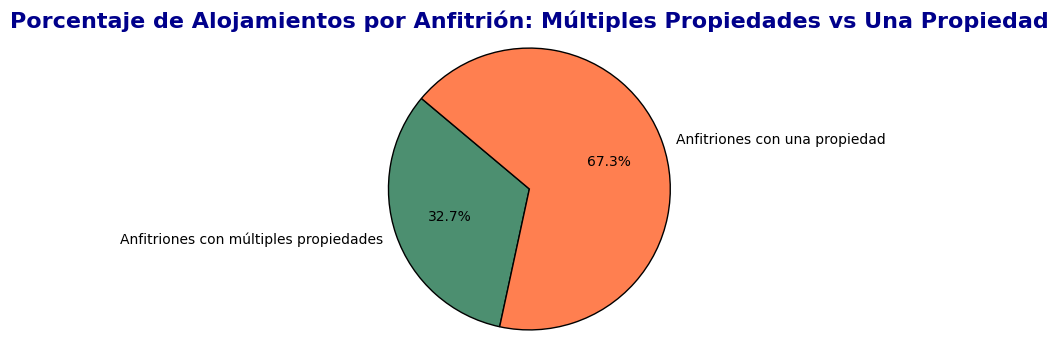

In [209]:
# Contar cuántos alojamientos gestiona cada anfitrión usando 'listing_id'
host_listings_count = df.groupby('host_id')['listing_id'].nunique()  # Uso de 'nunique' para contar propiedades únicas

# Calcular el número de anfitriones con una propiedad y con más de una propiedad
multi_property_hosts = host_listings_count[host_listings_count > 1].count()
single_property_hosts = host_listings_count[host_listings_count == 1].count()

# Calcular el número total de anfitriones
total_hosts = host_listings_count.count()

# Calcular los porcentajes de anfitriones con una propiedad y con múltiples propiedades
multi_property_percentage = (multi_property_hosts / total_hosts) * 100
single_property_percentage = (single_property_hosts / total_hosts) * 100

# Datos para el gráfico
labels = ['Anfitriones con múltiples propiedades', 'Anfitriones con una propiedad']
sizes = [multi_property_percentage, single_property_percentage]

# Gráfico de tarta
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4C8F70', '#FF7F50'], wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Alojamientos por Anfitrión: Múltiples Propiedades vs Una Propiedad', fontsize=16, weight='bold', color='darkblue')
plt.axis('equal')  # Para que la tarta sea circular
plt.show()

Observamos un 67.3% de propietarios con una sola propiedad, mientras que hay un 32.7% de propietarios con varias propiedades.

## 6. Perfil del cliente y del anfitrión.

### 6.1 ¿Cuáles son y dónde se encuentran los alojamientos con más reviews?

C:\Users\jorge\AppData\Local\Temp\ipykernel_604\594336989.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



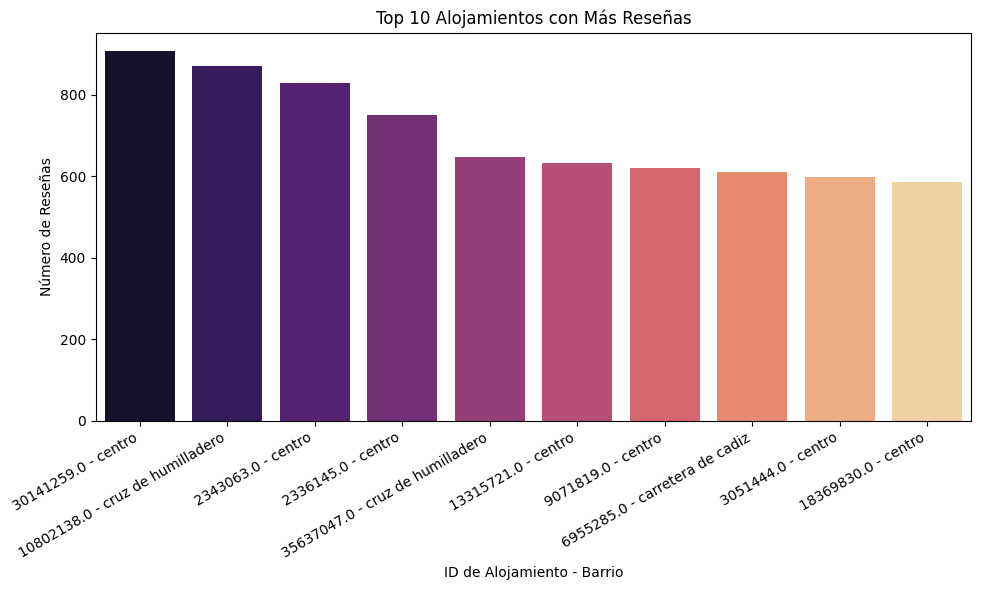

In [210]:
# Eliminar duplicados para asegurar que no se repita ningún alojamiento
df_unique = df.drop_duplicates(subset=['listing_id'])

# Seleccionar los 10 alojamientos con más reseñas, evitando duplicados
top_reviews = df_unique.nlargest(10, 'number_of_reviews')[['listing_id', 'neighbourhood', 'number_of_reviews']]

# Crear el dataframe para seaborn
top_reviews_df = top_reviews.copy()

# Formatear la etiqueta de los alojamientos (ID - Barrio)
top_reviews_df['listing_label'] = top_reviews_df['listing_id'].astype(str) + " - " + top_reviews_df['neighbourhood']

# Crear gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='listing_label', y='number_of_reviews', data=top_reviews_df, palette='magma')

# Mejorar la presentación
plt.title("Top 10 Alojamientos con Más Reseñas")
plt.xlabel("ID de Alojamiento - Barrio")
plt.ylabel("Número de Reseñas")

# Asegurarnos de que las etiquetas estén alineadas correctamente
ax.set_xticklabels(top_reviews_df['listing_label'], rotation=30, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [211]:
# Eliminar duplicados basados en el 'listing_id' para evitar repeticiones
df_unique = df.drop_duplicates(subset=['listing_id'])

# Seleccionar los 10 alojamientos con más reseñas
top_reviews_df = df_unique.nlargest(10, 'number_of_reviews')[['listing_id', 'neighbourhood', 'room_type', 'number_of_reviews', 'price']]

# Formatear el precio para mostrarlo con dos decimales y el símbolo de euros
top_reviews_df['price'] = top_reviews_df['price'].apply(lambda x: f"{x:.2f} €")

# Mostrar la tabla
top_reviews_df.reset_index(drop=True, inplace=True)
top_reviews_df

,listing_id,neighbourhood,room_type,number_of_reviews,price
0,30141259.0,centro,entire home/apt,906.0,88.00 €
1,10802138.0,cruz de humilladero,private room,871.0,38.00 €
2,2343063.0,centro,entire home/apt,829.0,59.00 €
3,2336145.0,centro,entire home/apt,749.0,69.00 €
4,35637047.0,cruz de humilladero,private room,646.0,27.00 €
5,13315721.0,centro,entire home/apt,632.0,96.00 €
6,9071819.0,centro,private room,621.0,24.00 €
7,6955285.0,carretera de cadiz,private room,609.0,37.00 €
8,3051444.0,centro,entire home/apt,599.0,133.00 €
9,18369830.0,centro,entire home/apt,586.0,83.00 €


En el centro es donde encontramos los alojamientos un un mayor número de reseñas. Esto no quiere decir que sean los mejores.

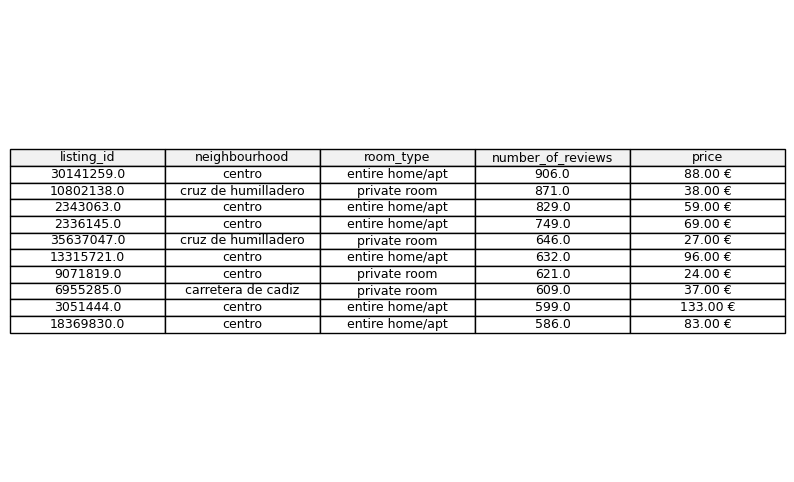

In [212]:
import matplotlib.pyplot as plt
import pandas as pd

# Eliminar duplicados basados en el 'listing_id' para evitar repeticiones
df_unique = df.drop_duplicates(subset=['listing_id'])

# Seleccionar los 10 alojamientos con más reseñas
top_reviews_df = df_unique.nlargest(10, 'number_of_reviews')[['listing_id', 'neighbourhood', 'room_type', 'number_of_reviews', 'price']]

# Formatear el precio para mostrarlo con dos decimales y el símbolo de euros
top_reviews_df['price'] = top_reviews_df['price'].apply(lambda x: f"{x:.2f} €")

# Crear una figura para la tabla
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la imagen según sea necesario
ax.axis('tight')
ax.axis('off')  # Desactivar los ejes

# Renderizar la tabla en la figura
table = ax.table(cellText=top_reviews_df.values, colLabels=top_reviews_df.columns, loc='center', cellLoc='center', colColours=['#f1f1f1']*len(top_reviews_df.columns))

# Guardar la tabla como una imagen
plt.savefig('tabla_top_10_resenas.png', bbox_inches='tight', dpi=300)

### 6.2 ¿Qué tan frecuente es el cambio de precio en función de la disponibilidad?

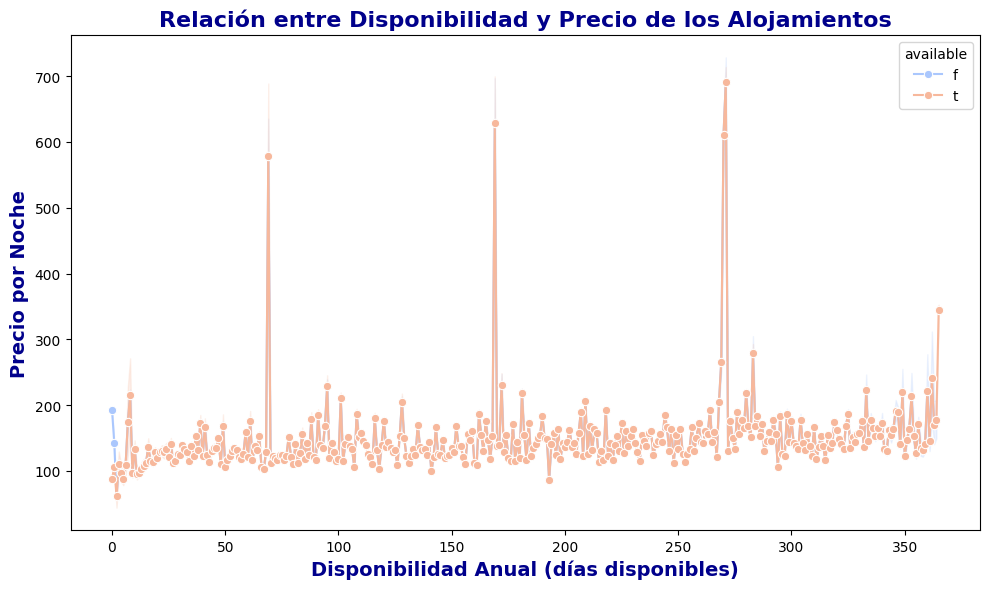

In [213]:
# Convertir la columna 'available' a categórica
df['available'] = df['available'].astype('category')

# Cambiar el tipo de gráfico a gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='availability_365', y='price', hue='available', palette='coolwarm', marker='o')

# Títulos y etiquetas
plt.title('Relación entre Disponibilidad y Precio de los Alojamientos', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Disponibilidad Anual (días disponibles)', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio por Noche', fontsize=14, weight='bold', color='darkblue')

plt.tight_layout()
plt.show()

## 7. Rentabilidad.

### 7.1 ¿Qué barrio ofrece los alojamientos más rentables en términos de ocupación y precio?

In [214]:
# Eliminar duplicados basándonos en 'listing_id'
df_unique = df.drop_duplicates(subset='listing_id')

# Calcular la tasa de ocupación
df_unique['occupancy_rate'] = 1 - (df_unique['availability_365'] / 365)

# Calcular métricas por barrio
neighbourhood_stats = df_unique.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    avg_occupancy=('occupancy_rate', 'mean'),
    total_listings=('listing_id', 'count')
).reset_index()

# Crear el gráfico de burbujas
fig = px.scatter(
    neighbourhood_stats,
    x='avg_price',
    y='avg_occupancy',
    size='total_listings',
    color='neighbourhood',
    hover_name='neighbourhood',
    size_max=50,
    labels={
        'avg_price': 'Precio Promedio (€)',
        'avg_occupancy': 'Tasa de Ocupación Promedio',
        'total_listings': 'Total de Alojamientos'
    },
    title='Rentabilidad por Barrio en Términos de Ocupación y Precio',
)

# Personalizar el diseño
fig.update_layout(
    xaxis=dict(title='Precio Promedio (€)'),
    yaxis=dict(title='Tasa de Ocupación Promedio'),
    title_font=dict(size=16, family='Arial', color='darkblue'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Mostrar el gráfico
fig.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_604\3078124732.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
# Calcular ingreso anual esperado por alojamiento
neighbourhood_stats['annual_revenue'] = neighbourhood_stats['avg_price'] * neighbourhood_stats['avg_occupancy'] * 365

# Crear el gráfico de burbujas mejorado
fig = px.scatter(
    neighbourhood_stats,
    x='avg_price',
    y='avg_occupancy',
    size='annual_revenue',
    color='neighbourhood',
    hover_name='neighbourhood',
    size_max=60,
    labels={
        'avg_price': 'Precio Promedio (€)',
        'avg_occupancy': 'Tasa de Ocupación Promedio',
        'annual_revenue': 'Ingresos Anuales Estimados (€)'
    },
    title='Rentabilidad por Barrio en Términos de Ocupación, Precio e Ingresos',
)

# Personalizar el diseño
fig.update_layout(
    xaxis=dict(title='Precio Promedio (€)'),
    yaxis=dict(title='Tasa de Ocupación Promedio'),
    title_font=dict(size=16, family='Arial', color='darkblue'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Mostrar el gráfico
fig.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_604\3322805349.py:41: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



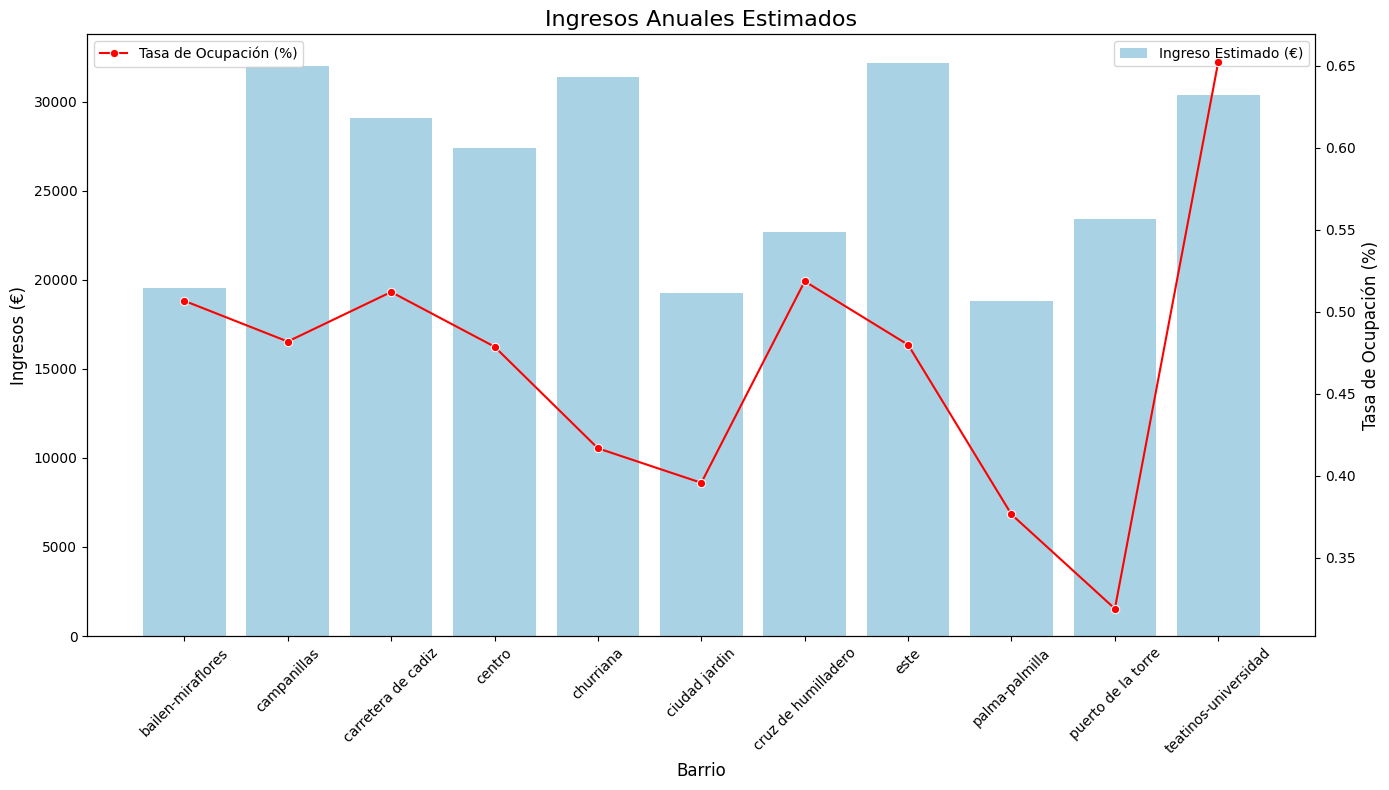

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que los datos están definidos
neighbourhood_data = neighbourhood_stats

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el gráfico de barras para los ingresos estimados
sns.barplot(
    x='neighbourhood',
    y='annual_revenue',
    data=neighbourhood_data,
    color='skyblue',
    alpha=0.8,
    label='Ingreso Estimado (€)',
    ax=ax
)

# Añadir etiquetas y título
ax.set_title('Ingresos Anuales Estimados', fontsize=16)
ax.set_xlabel('Barrio', fontsize=12)
ax.set_ylabel('Ingresos (€)', fontsize=12)

# Añadir la tasa de ocupación al gráfico
ax2 = ax.twinx()
sns.lineplot(
    x='neighbourhood',
    y='avg_occupancy',
    data=neighbourhood_data,
    color='red',
    marker='o',
    label='Tasa de Ocupación (%)',
    ax=ax2
)

# Ajustar etiquetas y título del segundo eje
ax2.set_ylabel('Tasa de Ocupación (%)', fontsize=12)
ax2.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [222]:
# Normalizar los nombres en ambos datasets
geo_data['neighbourhood'] = geo_data['neighbourhood'].str.strip().str.lower()
avg_price_df['neighbourhood'] = avg_price_df['neighbourhood'].str.strip().str.lower()

# Realizar el merge de nuevo
geo_data = geo_data.merge(avg_price_df, on='neighbourhood', how='left')

In [223]:
# Verificar los primeros registros después del merge
print(geo_data.head())

       neighbourhood  latitude  longitude  average_price  avg_price_x  \
0             centro   36.7213    -4.4217          120.0          120   
1               este   36.7202    -4.4122          100.0          100   
2      ciudad jardin   36.7333    -4.4333           80.0           80   
3  bailen-miraflores   36.7256    -4.4356           90.0           90   
4          churriana   36.6749    -4.4999          110.0          110   

   avg_price_y  
0          120  
1          100  
2           80  
3           90  
4          110  


In [228]:
import folium
import branca  # Importamos la librería para la escala de colores

# Si 'avg_price_x' tiene el símbolo de euro, lo eliminamos y convertimos a flotante
geo_data['avg_price_x'] = geo_data['avg_price_x'].replace({' €': ''}, regex=True).astype(float)

# Redondear los precios a dos decimales y agregar el símbolo de euros
geo_data['average_price'] = geo_data['avg_price_x'].round(2).apply(lambda x: f"{x} €")

# Crear un diccionario para el mapeo de colores basado en los valores numéricos
price_dict = geo_data.set_index('neighbourhood')['avg_price_x'].to_dict()  # Usar la columna 'avg_price_x' o la que corresponda

# Crear una escala de colores con 'branca'
color_scale = branca.colormap.LinearColormap(['yellow', 'red', 'purple'], 
                                             vmin=min(price_dict.values()), 
                                             vmax=max(price_dict.values()), 
                                             caption='Average Price (€)')

# Función para asignar colores según el precio promedio
def get_color(feature):
    value = price_dict.get(feature['properties']['neighbourhood'])
    if value is None:
        return '#BADADA'  # Color por defecto si no hay datos
    else:
        return color_scale(value)

# Crear el mapa base centrado en Málaga
map_avg_price = folium.Map(location=[36.7213, -4.4217], zoom_start=12)

# Asegurarse de que el GeoDataFrame tiene la geometría correcta
# Suponiendo que geo_data es un GeoDataFrame y tiene una columna 'geometry'
geo_data = geo_data.set_geometry('geometry')

# Crear el objeto GeoJSON
geojson_data = folium.GeoJson(
    geo_data,
    name='Average Price',
    tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'], 
                                           labels=True, 
                                           sticky=False),
    style_function=lambda feature: {
        'fillColor': get_color(feature),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9
    },
    highlight_function=lambda feature: {'weight': 3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}
)

# Añadir el GeoJSON al mapa
geojson_data.add_to(map_avg_price)

# Añadir la escala de colores al mapa
map_avg_price.add_child(color_scale)

# Mostrar el mapa
map_avg_price

ValueError: Unknown column geometry

# Código para hacer un mapa de la zona con el average price.

feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Kauai']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para 8 personas en Kauai", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()

adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
adam = adam.dropna(subset=['average_price'])

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price')
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    if value is None:
        return '#BADADA'
    else:
        return color_scale(value)
    
map3 = folium.Map(location=[22.073414994647898, -159.5257299787407], zoom_start=10)
folium.GeoJson(data=adam,
               name='Hawaii',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.9 },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3.add_child(color_scale)

# Este no sé para qué es pero es útil.

import nltk
nltk.download('stopwords')
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Probar a hacer algo en streamlit